### **Bank Loan Default Risk Analysis**

#### **Introduction**
**Loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.**

*Dataset Credits: https://www.kaggle.com/datasets/nikhil1e9/loan-default*

#### **Problem Statement**
**This project aims to analyze historical loan data to uncover key patterns and indicators associated with loan defaults, enabling data-driven decisions that improve credit risk assessment and customer profiling.**

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

**1. DATA COLLECTION AND UNDERSTANDING**

In [2]:
pwd

'C:\\Users\\abhir\\Desktop\\Bank Loan Default Risk Analysis'

In [3]:
df = pd.read_csv("C:\\Users\\abhir\\Desktop\\Bank Loan Default Risk Analysis\\BankLoanDefaultRiskAnalysis.csv")

In [4]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [5]:
df.tail()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
255342               4         14.11        12      0.85   Bachelor's   
255343               2         11.55        24      0.21  High School   
255344               3          5.29        60      0.50  High School   
255345               1         20.90        48      0.44  High School   
255346               2          6.73        12      0.48   Bachelor's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
255342      Full-time       Married          No            No       Other   
255343      Part-time      Divorced          No            No        Home   
255344  Self-employed       Married         Yes           Yes        Auto   
255345      Part-time        Single         Yes           Yes       Other   
255346     Unemployed      Divorced         Yes            No   Education   

       HasCoSigner  Default  
255342          No        0  
255343          No        1  
255344         Yes        0  
255345          No        0  
255346         Yes        0

In [6]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

**DEFINING THE COLUMNS AND THEIR DATA-TYPES**

| Column Name  | Column Type | Data Type | Description |
|:-----------:  |:-----------:| :----------:|:-----------:|
|LoanID        |Indetifier  |String    | A unique Identifier for each loan|
|Age           |Feature     |Integer   | The Age of the Borrower |
|Income        |Feature     |Integer   | The Annual Income of the Borrower|
|LoanAmount    |Feature     |Integer   | The amount sanctioned to the Borrower |
|CreditScore   |Feature     |Integer   | The Credit score of the Borrower, indicating the credit worthiness |
|MonthsEmployed|Feature     |Integer   | The number of months the Borrower has been employed |
|NumCreditLines|Feature     |Integer   | The number of credit lines the Borrower has open
|InterestRate  |Feature     |Float     | The rate of interest at which the loan has been credited |
|LoanTerm      |Feature     |Integer   | The tenure for which the loan has been sanctioned in months |
|DTIRatio      |Feature     |Float     | The Debt-to-Income ratio indicates the borrower's debt compared to their income |
|Education     |Feature     |String    | The Highest level of education done attained by the borrower (PhD.,Masters, Bachelor's, High School)|
|EmploymentType|Feature     |String    | The Type of employment status of the borrower (Full-Time, Part-Time, Self-Employed, Unemployed)|
|MaritalStatus |Feature     |String    | The Marital Status of the borrower (Single, Married, Divorced)|
|HasMortgage   |Feature     |String    | Whether the borrower has Mortgage (Yes or No) |
|HasDependents |Feature     |String    | Whether the borrower has Dependents (Yes or No) |
|LoanPurpose   |Feature     |String    | What was the purpose of the loan (Home, Auto, Education, Business, Others)|
|HasCoSigner   |Feature     |String    | Whether the loan has a co-signer (Yes or No)|
|Default       |Target      |Integer   | This binary indicates whether the loan has defaulted or not (0{No} or 1{Yes})|

----

**2. DATA CLEANING AND TRANSFORMATION**

**CHECKING NULL/MISSING VALUES**

In [7]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

**IDENTIFYING AND REMOVING DUPLICATES**

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
255342    False
255343    False
255344    False
255345    False
255346    False
Length: 255347, dtype: bool

**TRANSFORMING THE DATA TYPES TO DESIRED FORMAT**

In [9]:
cat_col = df.select_dtypes(include=['object']).columns

for col in cat_col:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  category
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

**OUTLIER DETECTION**

In [10]:
out_col = df[['Income','LoanAmount','CreditScore']].columns

for i in out_col:
    #calculate the 25th percentile and 75th percentile
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    #calculate the outerbounds
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    #Detect and print outliers
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f'Total Outliers detected in {i}:{len(outliers)}\n')
    

Total Outliers detected in Income:0

Total Outliers detected in LoanAmount:0

Total Outliers detected in CreditScore:0



**INTERPRETETION:** *No Null/Missing & duplicates values found. For reduced memory usage and imporved efficiency, change the string columns to category. Also, to ensure the robustness of the analysis, we tried finding any outliers within the LoanAmount, Income, CreditScore. Used the IQR method to identify the outer bounds. I took beyond 1.5 times IQR from the lower and upper bounds. However, no such Outliers were detected. If we would have found any Outliers we could have removed them or capped them (Winsorization) based on their impact to ensure a more accurate statistical analysis and vizualisation.*

----

**3. EXPLORATORY DATA ANALYSIS**

* **SUMMARY STATS FOR NUMERICAL COLUMNS**

In [11]:
df.describe().T

count           mean           std      min       25%  \
Age             255347.0      43.498306     14.990258     18.0     31.00   
Income          255347.0   82499.304597  38963.013729  15000.0  48825.50   
LoanAmount      255347.0  127578.865512  70840.706142   5000.0  66156.00   
CreditScore     255347.0     574.264346    158.903867    300.0    437.00   
MonthsEmployed  255347.0      59.541976     34.643376      0.0     30.00   
NumCreditLines  255347.0       2.501036      1.117018      1.0      2.00   
InterestRate    255347.0      13.492773      6.636443      2.0      7.77   
LoanTerm        255347.0      36.025894     16.969330     12.0     24.00   
DTIRatio        255347.0       0.500212      0.230917      0.1      0.30   
Default         255347.0       0.116128      0.320379      0.0      0.00   

                      50%        75%       max  
Age                 43.00      56.00      69.0  
Income           82466.00  116219.00  149999.0  
LoanAmount      127556.00  188985.00  249999.0  
CreditScore        574.00     712.00     849.0  
MonthsEmployed      60.00      90.00     119.0  
NumCreditLines       2.00       3.00       4.0  
InterestRate        13.46      19.25      25.0  
LoanTerm            36.00      48.00      60.0  
DTIRatio             0.50       0.70       0.9  
Default              0.00       0.00       1.0

* **SUMMARY STATISTICS FOR CATEGORICAL COLUMNS**

In [12]:
df.describe(include=['category']).T

count  unique         top    freq
LoanID          255347  255347  0003HW9UAA       1
Education       255347       4  Bachelor's   64366
EmploymentType  255347       4   Part-time   64161
MaritalStatus   255347       3     Married   85302
HasMortgage     255347       2         Yes  127677
HasDependents   255347       2         Yes  127742
LoanPurpose     255347       5    Business   51298
HasCoSigner     255347       2         Yes  127701

* **UNIVARIATE ANALYSIS**

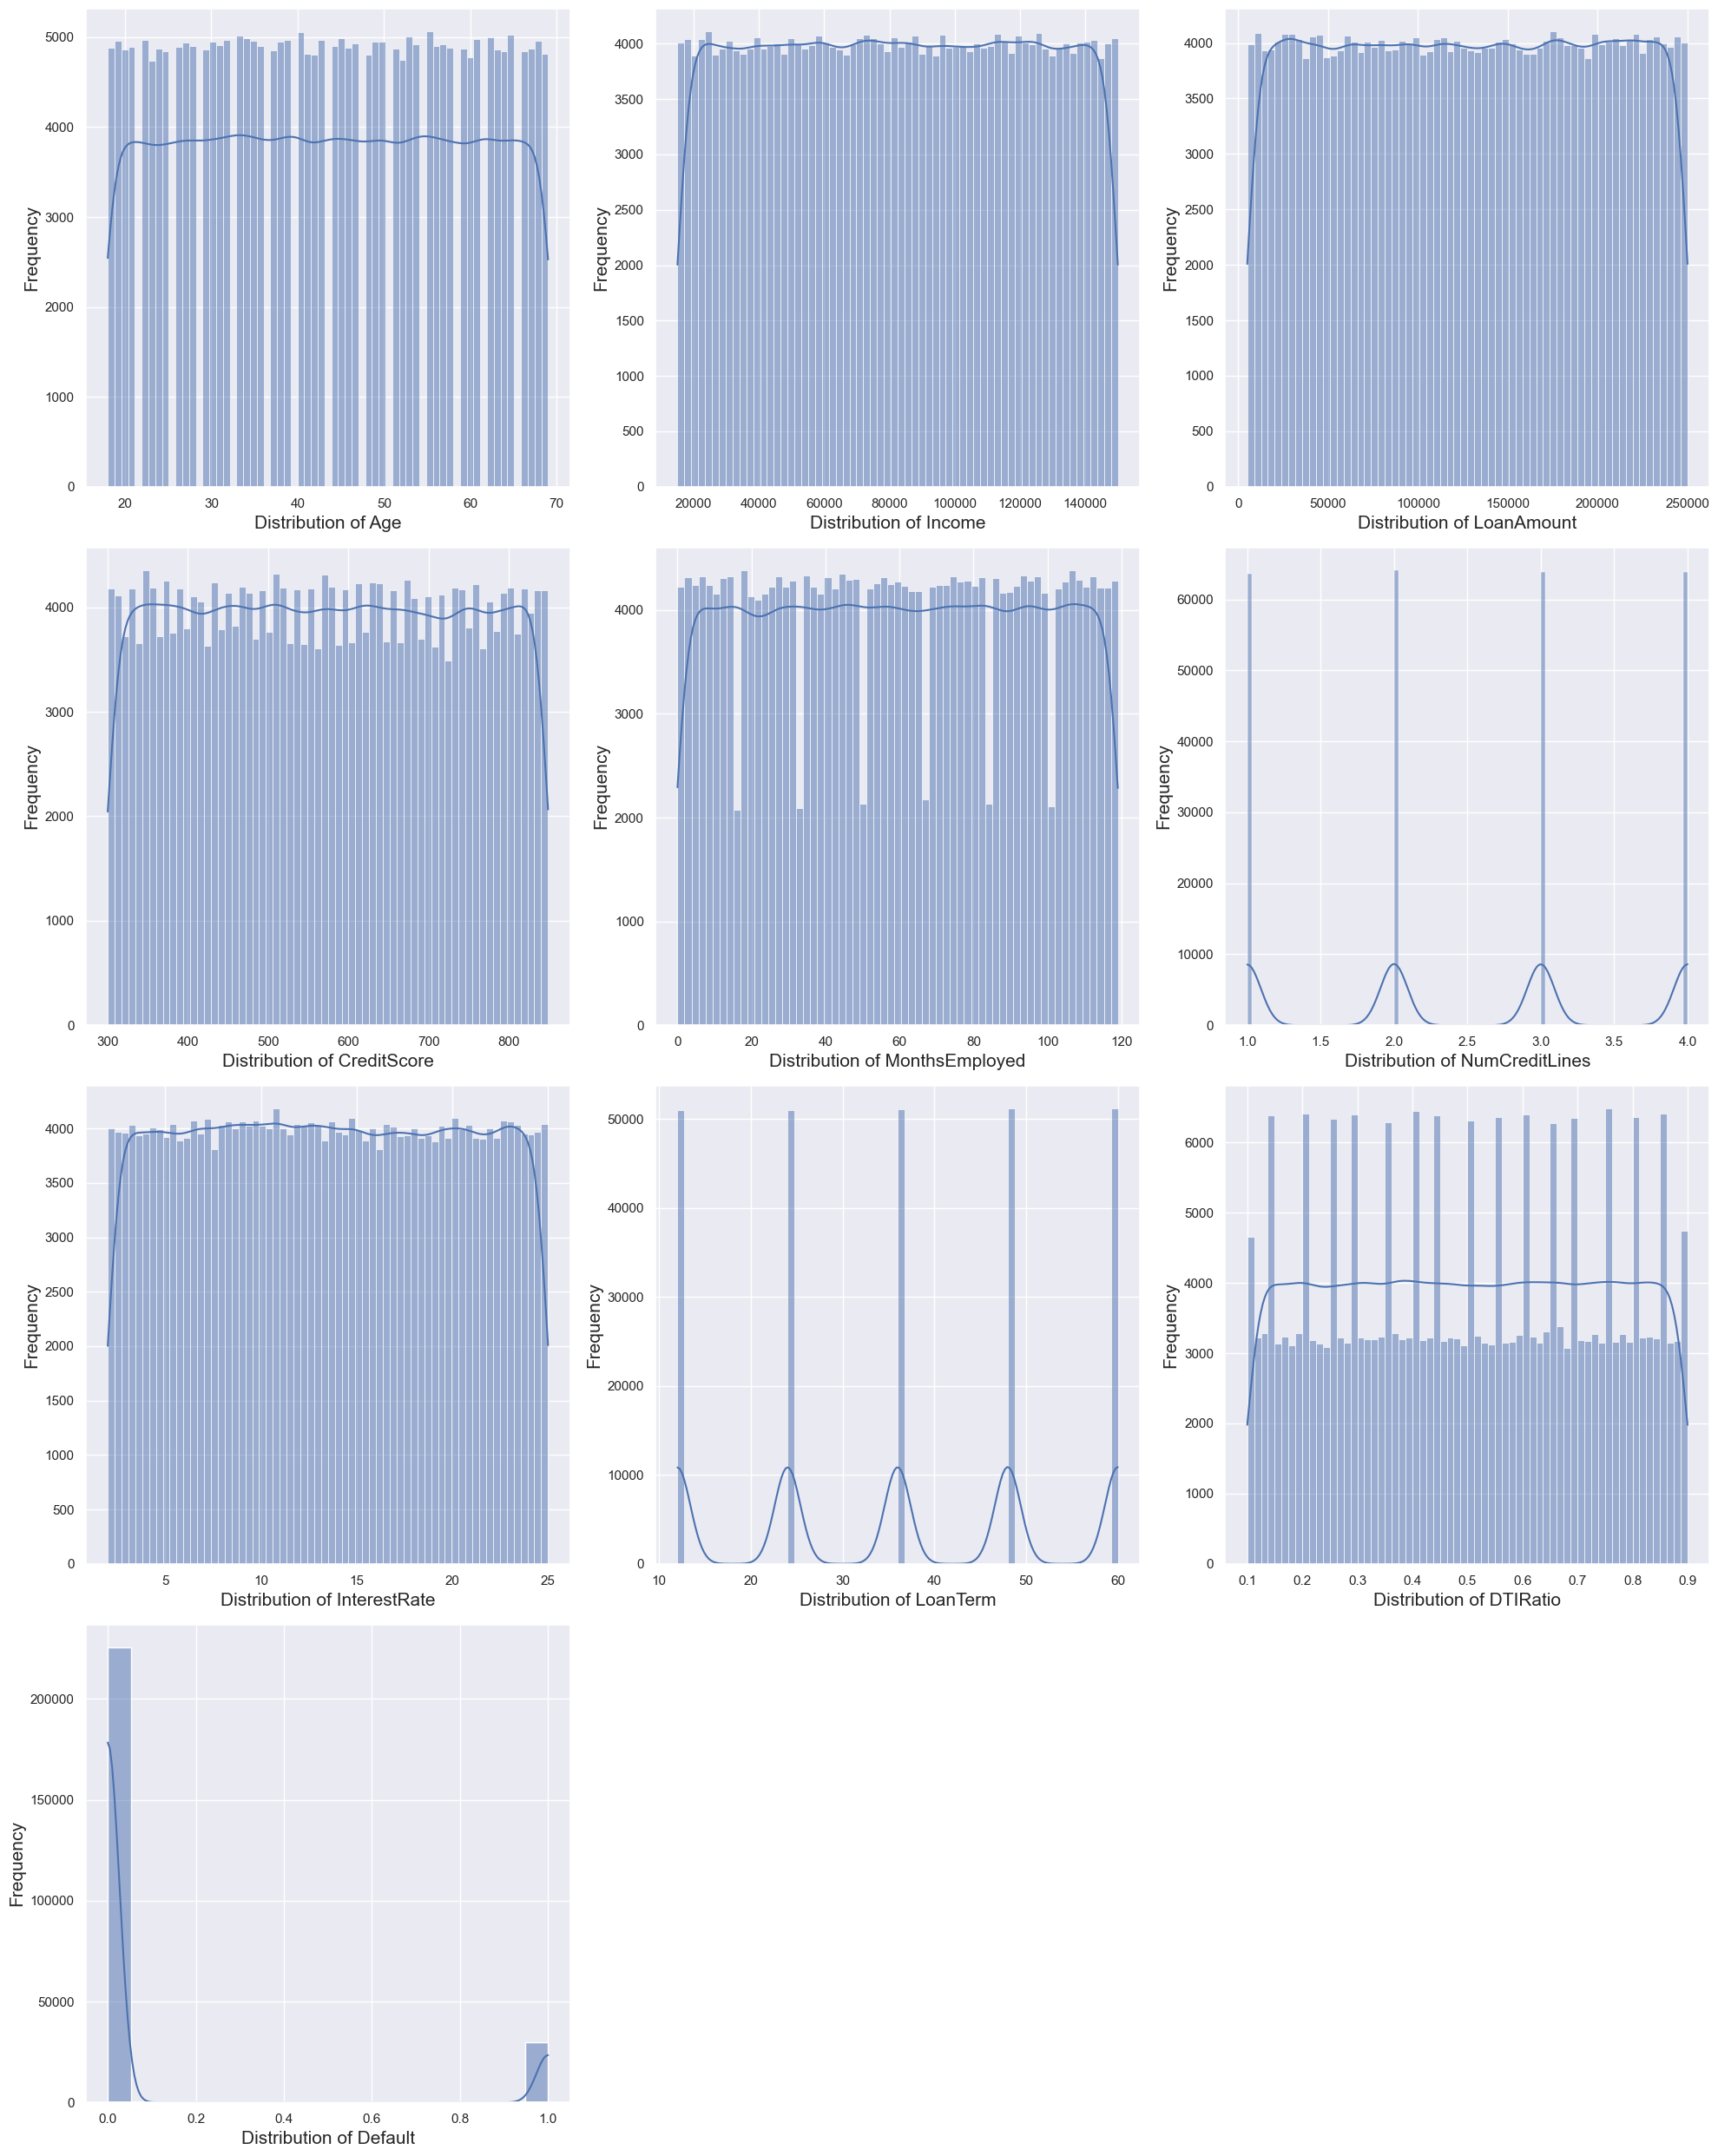

In [13]:
#Numerical Features

num_col = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(20,25))
pltno=1

for col in num_col:
    if pltno <= 10:
        plt.subplot(4,3,pltno)
        sns.histplot(df[col], kde=True, bins='auto')
        plt.xlabel(f'Distribution of {col}', fontsize=15)
        plt.ylabel('Frequency', fontsize=15)
    pltno+=1

plt.tight_layout()
plt.show()

**CHECK THE SKEWNESS AND KURTOSIS OF THE NUMERICAL FEATURES**

* (-0.5, 0.5) — low or approximately symmetric.
* (-1, -0.5) U (0.5, 1) — moderately skewed.
*  Beyond -1 and 1 — Highly skewed.

---

* Mesokurtic distribution (kurtosis = 3, excess kurtosis = 0): perfect normal distribution or very close to it.
* Leptokurtic distribution (kurtosis > 3, excess kurtosis > 0): sharp peak, heavy tails
* Platykurtic distribution (kurtosis < 3, excess kurtosis < 0): flat peak, light tails

In [14]:
for i in num_col:
    print(f'The Skewness of {i} is: {df[i].skew():.4f}')
    print(f'The Kurtosis of{i} is: {df[i].kurtosis():.4f}')
    print('-'*50)

The Skewness of Age is: 0.0007
The Kurtosis ofAge is: -1.1984
--------------------------------------------------
The Skewness of Income is: -0.0004
The Kurtosis ofIncome is: -1.1984
--------------------------------------------------
The Skewness of LoanAmount is: -0.0018
The Kurtosis ofLoanAmount is: -1.2037
--------------------------------------------------
The Skewness of CreditScore is: 0.0047
The Kurtosis ofCreditScore is: -1.2003
--------------------------------------------------
The Skewness of MonthsEmployed is: -0.0021
The Kurtosis ofMonthsEmployed is: -1.1996
--------------------------------------------------
The Skewness of NumCreditLines is: -0.0003
The Kurtosis ofNumCreditLines is: -1.3577
--------------------------------------------------
The Skewness of InterestRate is: 0.0046
The Kurtosis ofInterestRate is: -1.1972
--------------------------------------------------
The Skewness of LoanTerm is: -0.0022
The Kurtosis ofLoanTerm is: -1.2999
----------------------------------

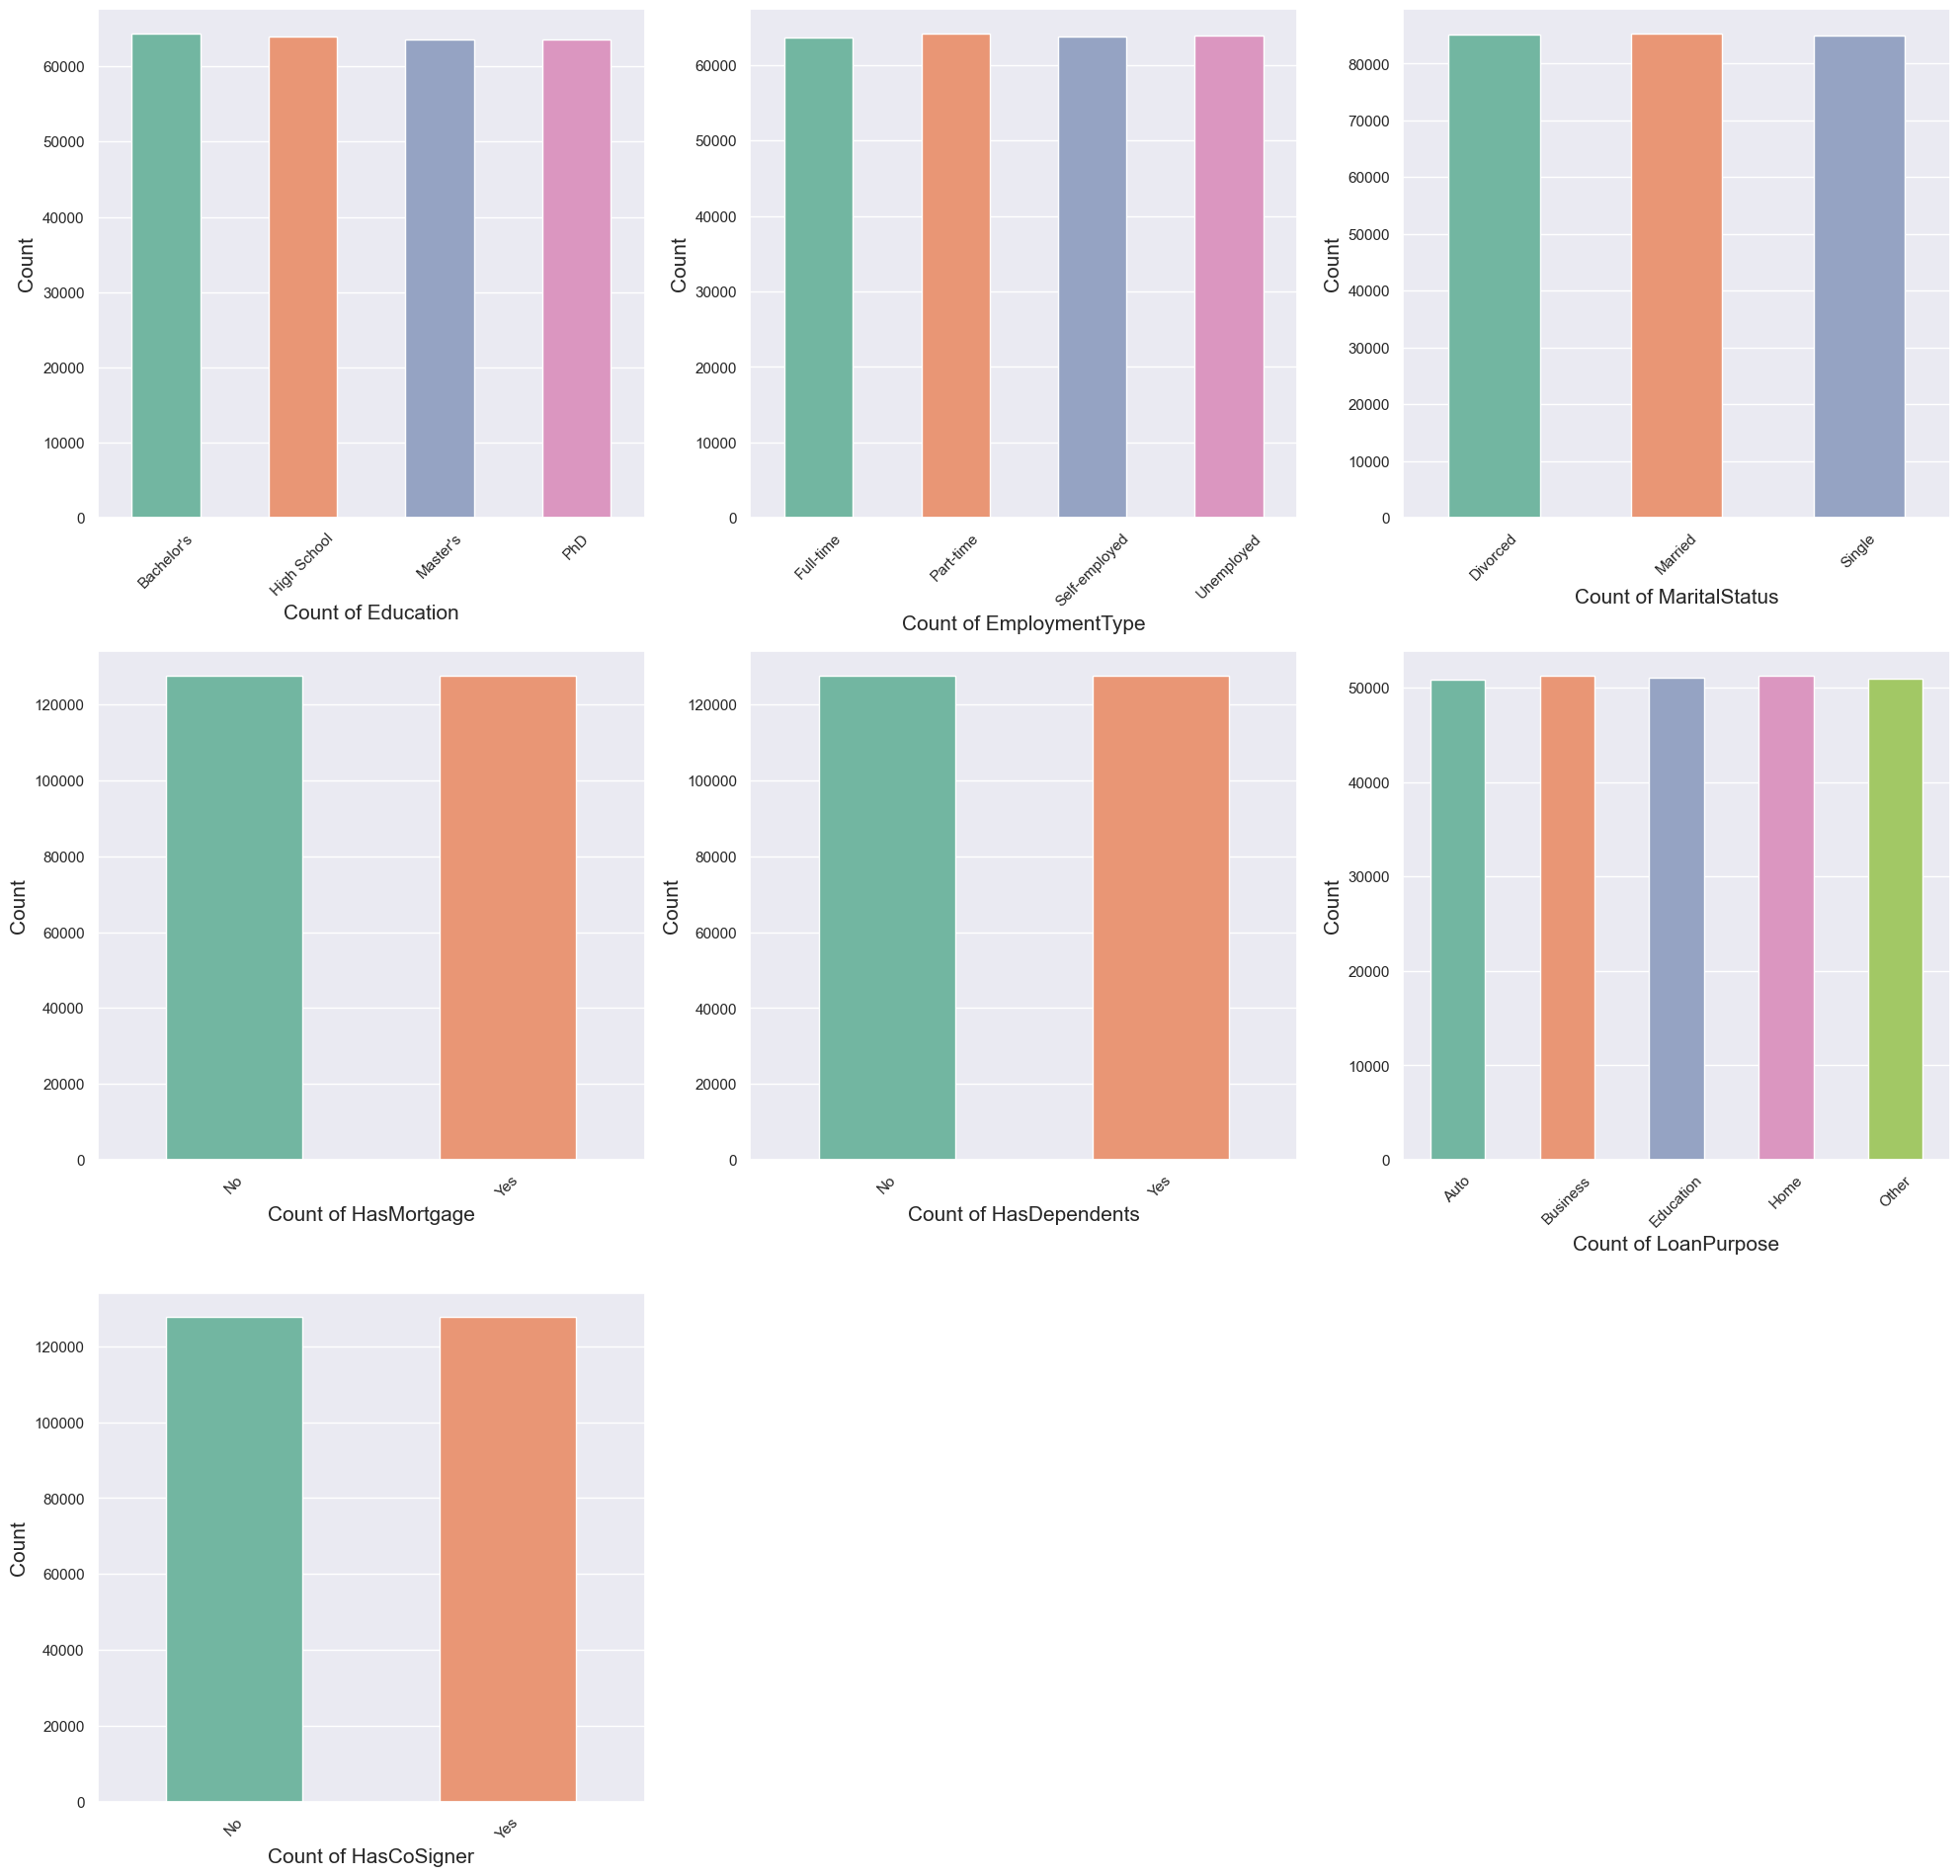

In [15]:
#Categorical Features

cat_col = df[['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']].columns

plt.figure(figsize=(20,25))
pltno = 1

for col in cat_col:
    if pltno <=7:
        plt.subplot(4,3, pltno)
        sns.countplot(x=df[col], palette='Set2', width=0.5)
        plt.xlabel(f'Count of {col}', fontsize=15)
        plt.xticks(rotation=45)
        plt.ylabel('Count', fontsize=15)
    pltno+=1
plt.tight_layout()
plt.show()

In [16]:
for i in cat_col:
    col = df.groupby(i)['LoanID'].count()
    print(f'Count of {col}')
    print('-'*40)

Count of Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: LoanID, dtype: int64
----------------------------------------
Count of EmploymentType
Full-time        63656
Part-time        64161
Self-employed    63706
Unemployed       63824
Name: LoanID, dtype: int64
----------------------------------------
Count of MaritalStatus
Divorced    85033
Married     85302
Single      85012
Name: LoanID, dtype: int64
----------------------------------------
Count of HasMortgage
No     127670
Yes    127677
Name: LoanID, dtype: int64
----------------------------------------
Count of HasDependents
No     127605
Yes    127742
Name: LoanID, dtype: int64
----------------------------------------
Count of LoanPurpose
Auto         50844
Business     51298
Education    51005
Home         51286
Other        50914
Name: LoanID, dtype: int64
----------------------------------------
Count of HasCoSigner
No     127646
Yes    127701
Name: LoanID, dtype: int64
----

**INTERPRETATION:** *Numerical features are approximately symmetric and follows a platykurtic normal distribution with flat peak and light tails. The categorical features have equal number of data divided between the subfeatures. The Loan Defualt feature when plotted shows that most loan borrowers are paying/have paid the debt on time. Although it cannot be confidently concluded that most loan borrowers are part-time employees and are looking to start a business, but we can assume the aforesaid.*

* **BIVARIATE ANALYSIS**

In [17]:
df.select_dtypes(['int64','float64']).columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

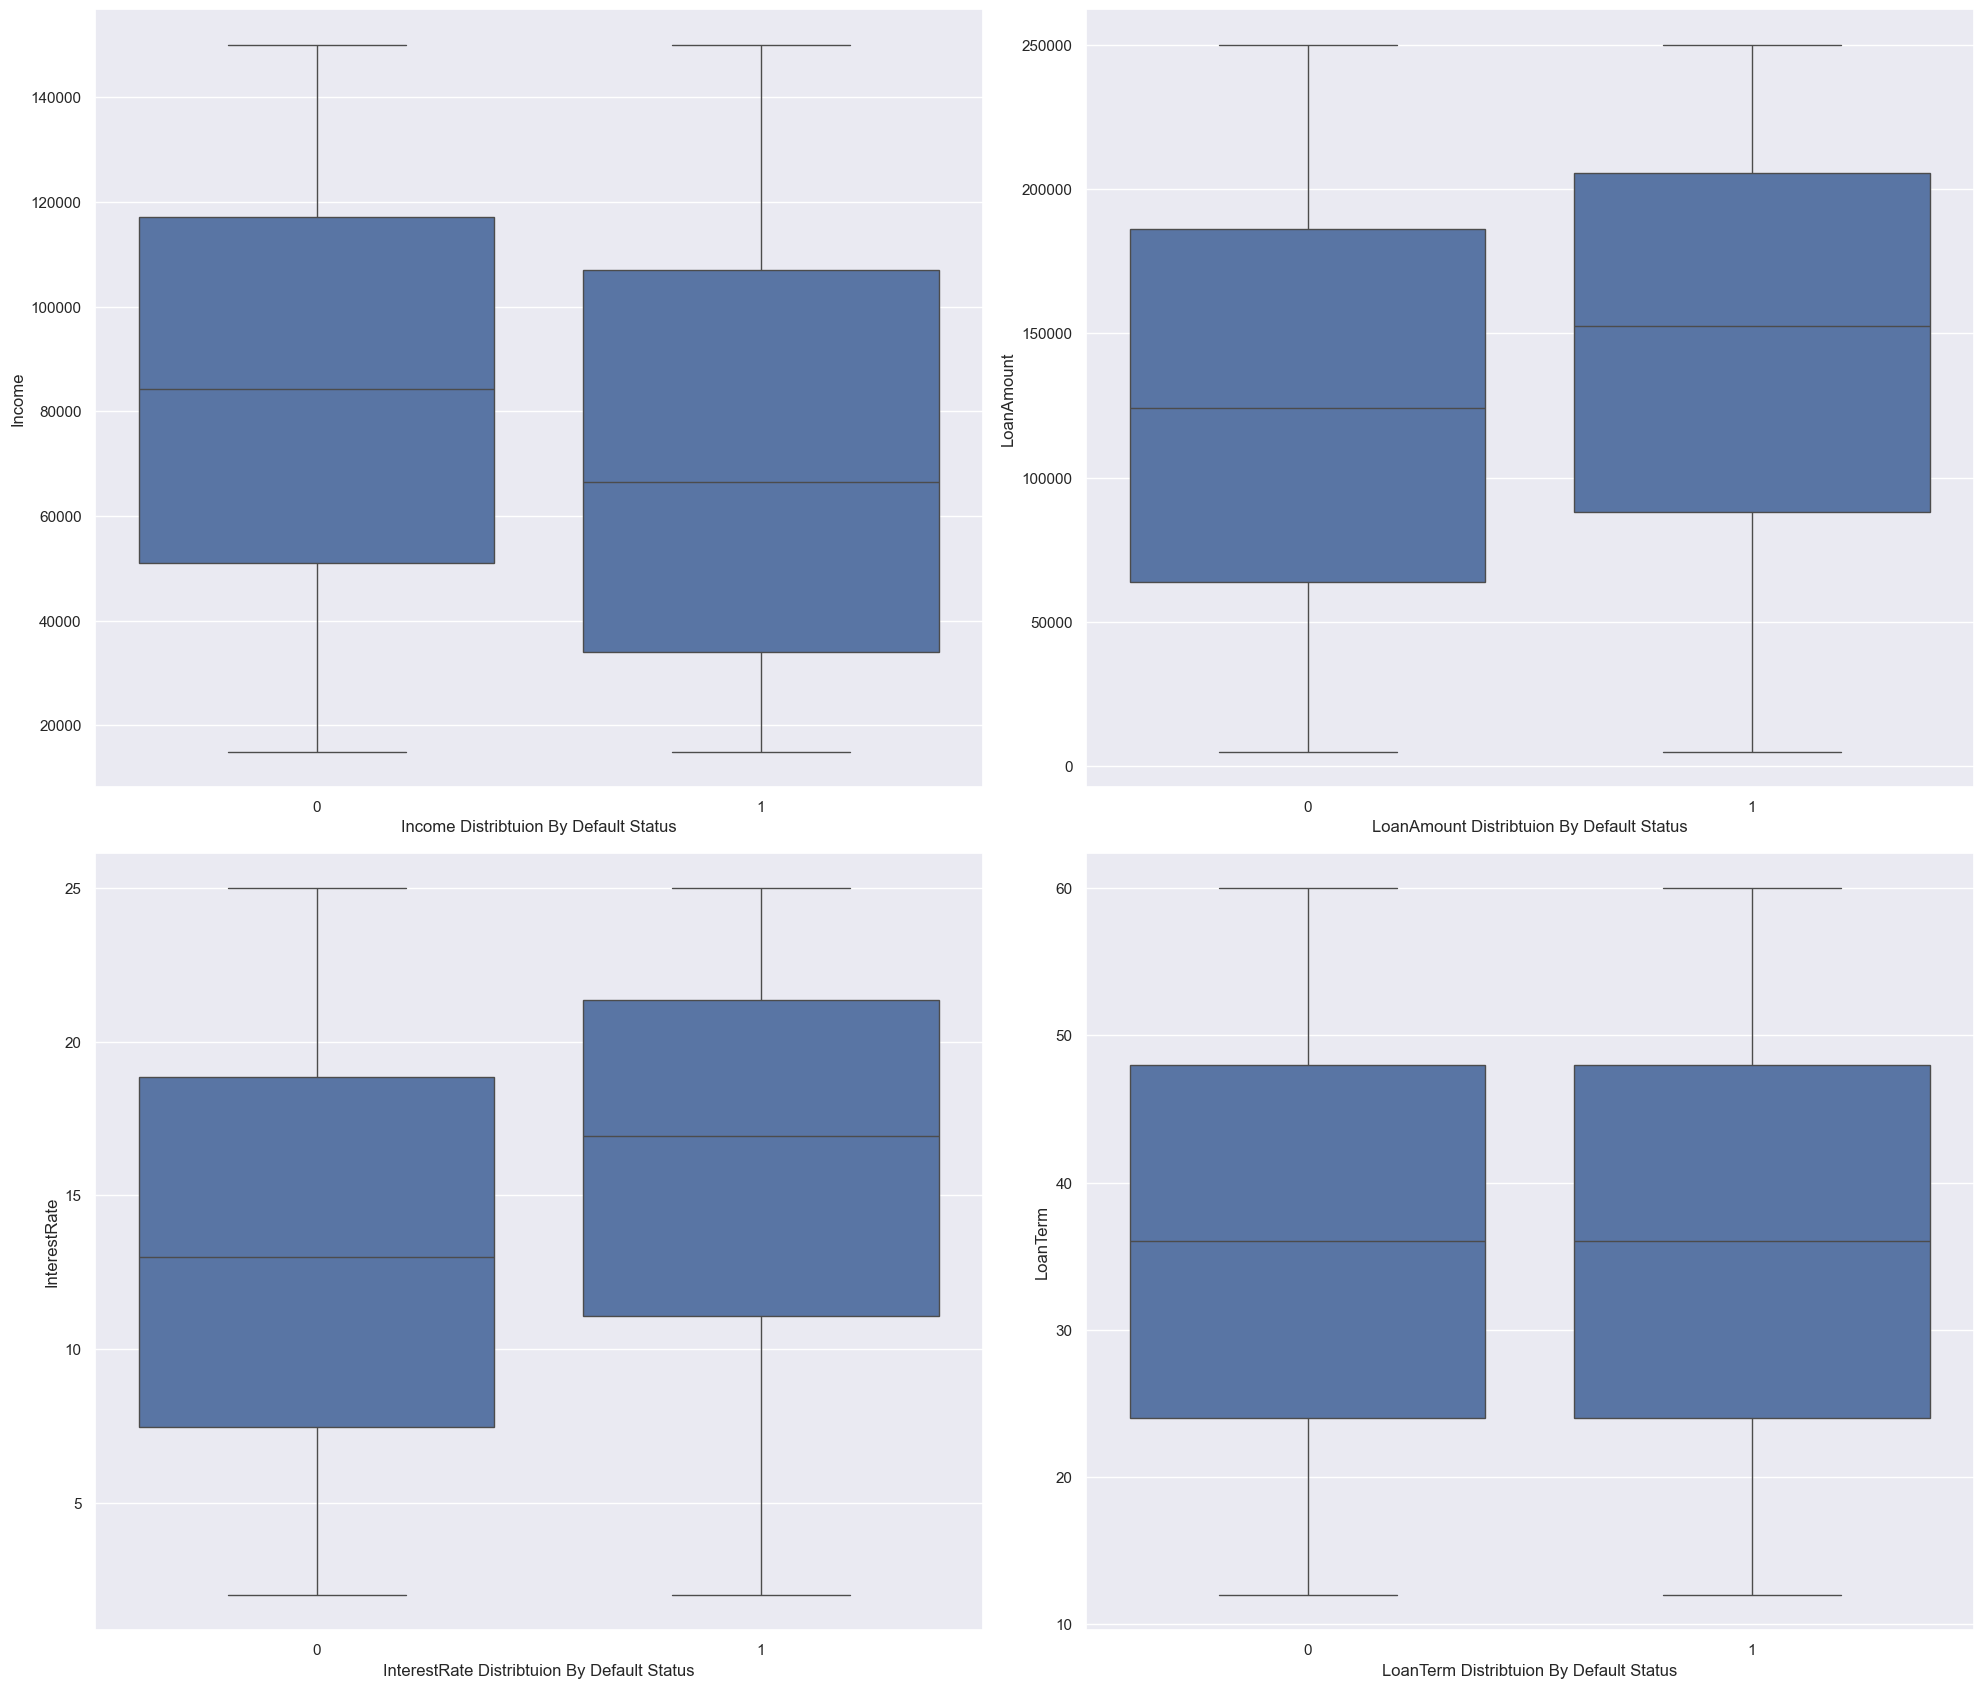

In [18]:
# Numerical vs Target Feature

num_col = df[['Income', 'LoanAmount','InterestRate', 'LoanTerm']]
plt.figure(figsize=(20,25))
pltno = 1

for col in num_col:
    if pltno <=4:
        plt.subplot(3,2,pltno)
        sns.boxplot(data=df, x='Default', y=col)
        plt.xlabel(f'{col} Distribtuion By Default Status')
    pltno+=1
plt.tight_layout()
plt.show()

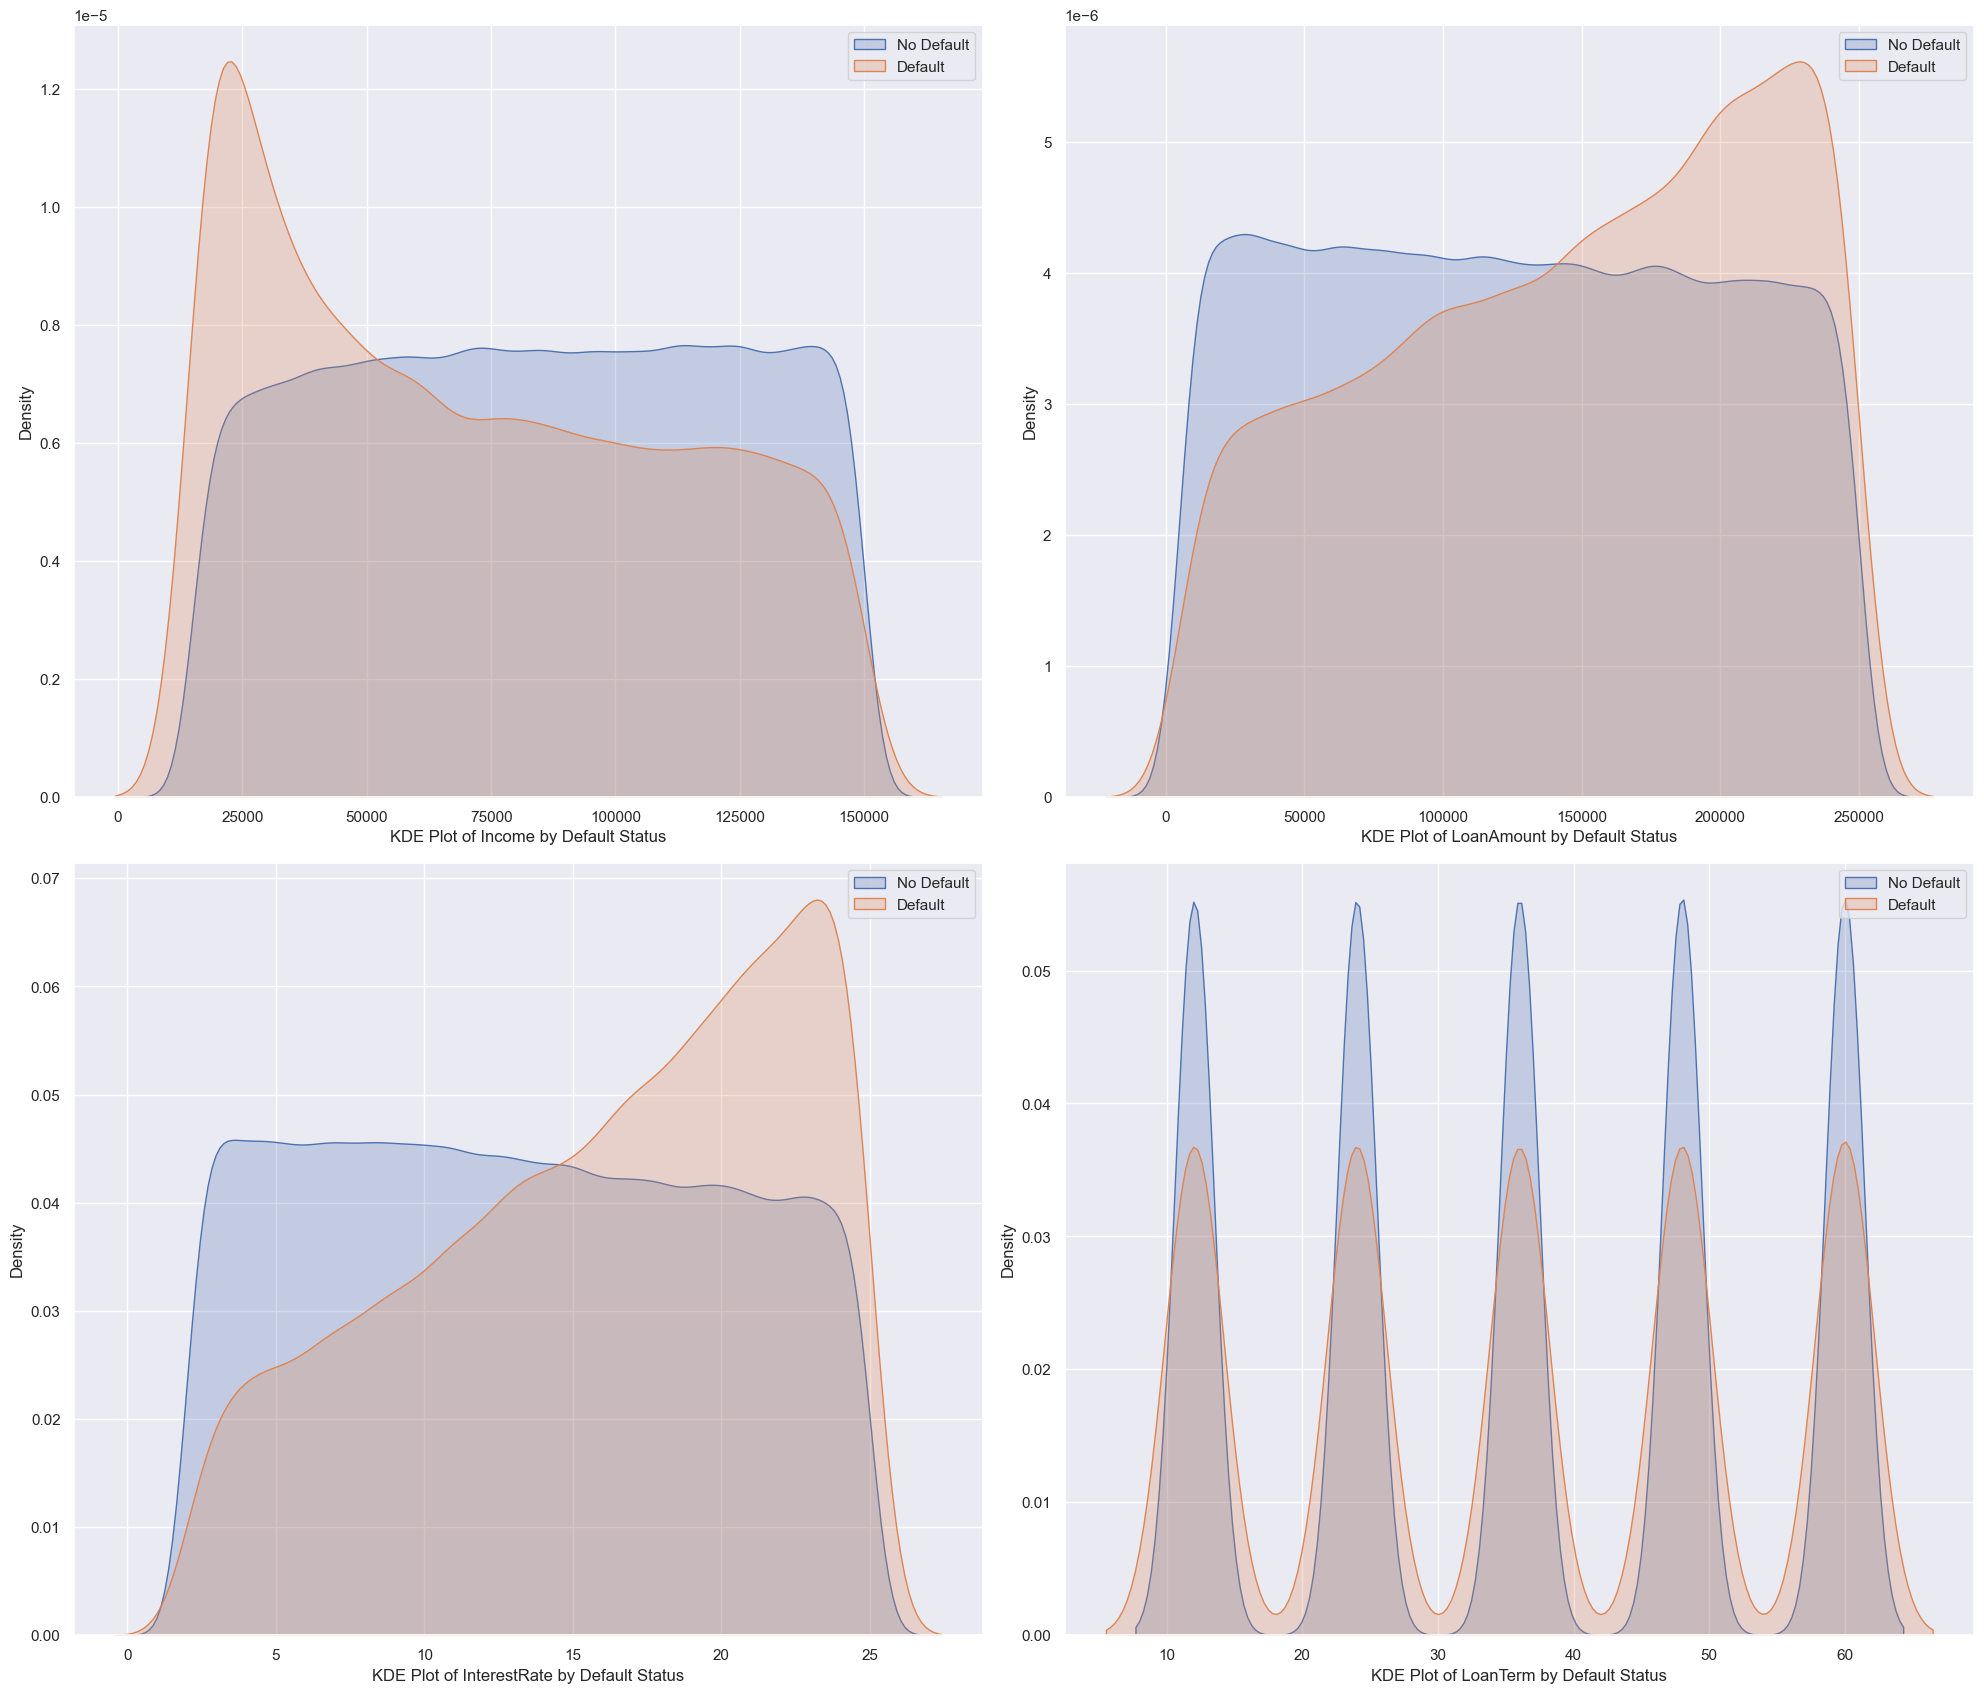

In [19]:
num_col = df[['Income', 'LoanAmount','InterestRate', 'LoanTerm']]
plt.figure(figsize=(20,25))
pltno = 1

for col in num_col:
    if pltno<=4:
        plt.subplot(3,2, pltno)
        sns.kdeplot(data=df[df['Default']==0][col], label= 'No Default', shade=True)
        sns.kdeplot(data=df[df['Default']==1][col], label= 'Default', shade=True)
        plt.xlabel(f'KDE Plot of {col} by Default Status')
        plt.legend()
    pltno+=1
plt.tight_layout()
plt.show()

**INTERPRETATION:**

1. ***Income Vs. Loan Default:** Borrowers with less than 30,000 per month are more likely to default on their loans. This suggests that individuals with lower income will have greater challenges meeting the replayment obligations.*
2. ***Loan Amount Vs. Loan Default:** There is an upward trend indicating that higher loan amounts may have more defaulters. Larger financial liabiliteis will most likely increase the burden of repayment especially among those with lower monthly income.*
3. ***Interest Rate Vs. Loan Default:** A notable concentration of defaulters is observed with interest rates more than 20% and and average defaulter cluster around 17%. This implies higher interest rate burdens may directly lead to repayment failures.*
4. ***Loan Term Vs. Loan Default:** The Loan term remains relatively unfiorm among the defaulters and non-defaulters. Loan term has no such strong influence on the Loan Default.*

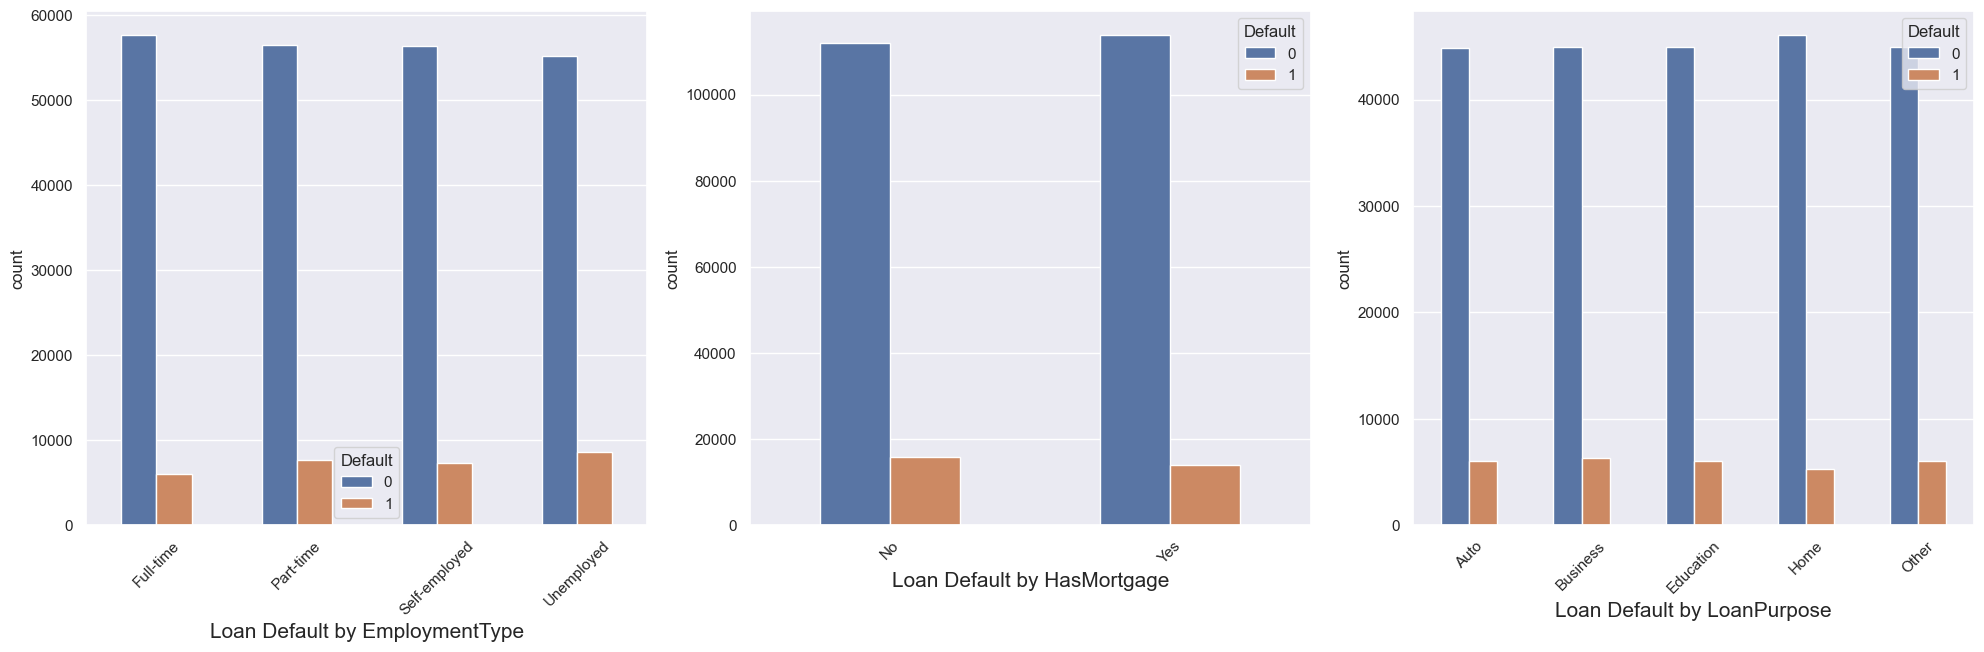

------------------------------------------------------------------------------------------------------------------------------------------------------
EmploymentType
Unemployed       0.135529
Part-time        0.119652
Self-employed    0.114620
Full-time        0.094634
Name: Default, dtype: float64
----------------------------------------
HasMortgage
No     0.123451
Yes    0.108806
Name: Default, dtype: float64
----------------------------------------
LoanPurpose
Business     0.123260
Auto         0.118814
Education    0.118381
Other        0.117885
Home         0.102348
Name: Default, dtype: float64
----------------------------------------


In [20]:
# Categorical vs Target Feature

cat_col = df[['EmploymentType','HasMortgage','LoanPurpose']].columns

plt.figure(figsize=(20,25))
pltno = 1

for col in cat_col:
    if pltno <=3:
        plt.subplot(4,3, pltno)
        sns.countplot(x=df[col], hue=df['Default'], width=0.5)
        plt.xlabel(f'Loan Default by {col}', fontsize=15)
        plt.xticks(rotation=45)
    pltno+=1
plt.tight_layout()
plt.show()

print('-'*150)
for col in cat_col:
    default_rate = df.groupby(col)['Default'].mean().sort_values(ascending=False)
    print(default_rate)
    print('-'*40)

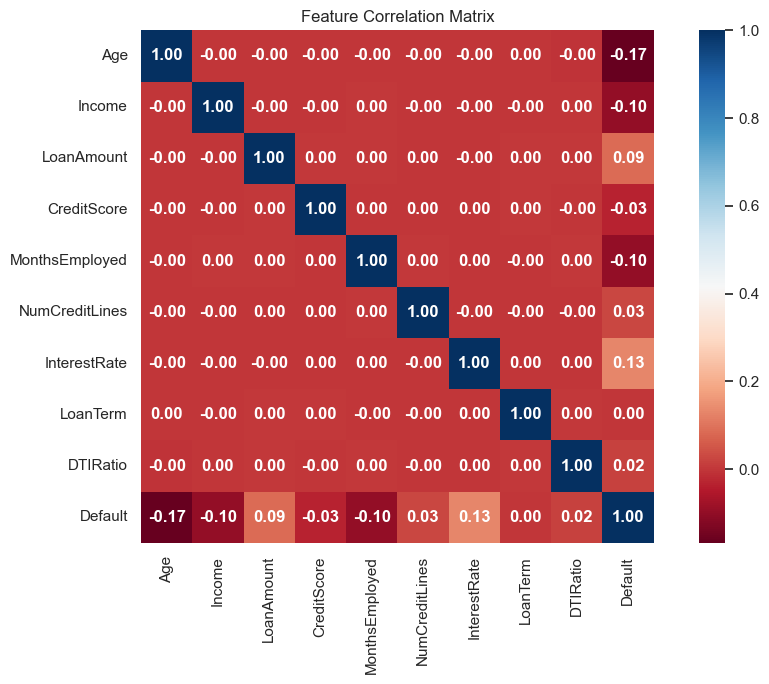

In [21]:
# Numerical Vs. Numerical

plt.figure(figsize=(10,7))
sns.heatmap(data=df.select_dtypes(['int64','float64']).corr(), cmap='RdBu', annot=True, annot_kws={'fontweight':'bold'}, fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

**INTERPRETATION:**

1. **AGE TO DEFAULT CORRELATION:** -0.17. Slightly lower age is linked to Loan Default, which means Younger borrowers may be financially less stable.
2. **INCOME TO DEFAULT CORRELATION:** -0.10. Weak negative correlation to default may suggest that borrowers with less income may be at more risk to fail the repayment obligations.
3. **LOAN AMOUNT TO DEFAULT CORRELATION:** 0.09. Slightly positive correlation means higher loan amount may increase default risk.
4. **INETREST RATE TO DEFAULT CORRELATION:** 0.13. Modest positive correlation: higher interest rates linked with higher default chance.
5. **CREDIT SCORE TO DEFAULT CORRELATION:**-0.03. Almost no correlation. Suprisingly credit score should have strong correlation.
6. **LOAN TERM/DTI/CREDIT LINES TO DEFAULT CORRELATION:** Very weak to No correation.

***Age, Income, & Interest Rates show the most notable correlation (though weak), which can be further used for logistic regression as we cannot solely rely on linear correlation.***

* **MULTIVARIATE ANALYSIS**

<Figure size 2000x2500 with 0 Axes>

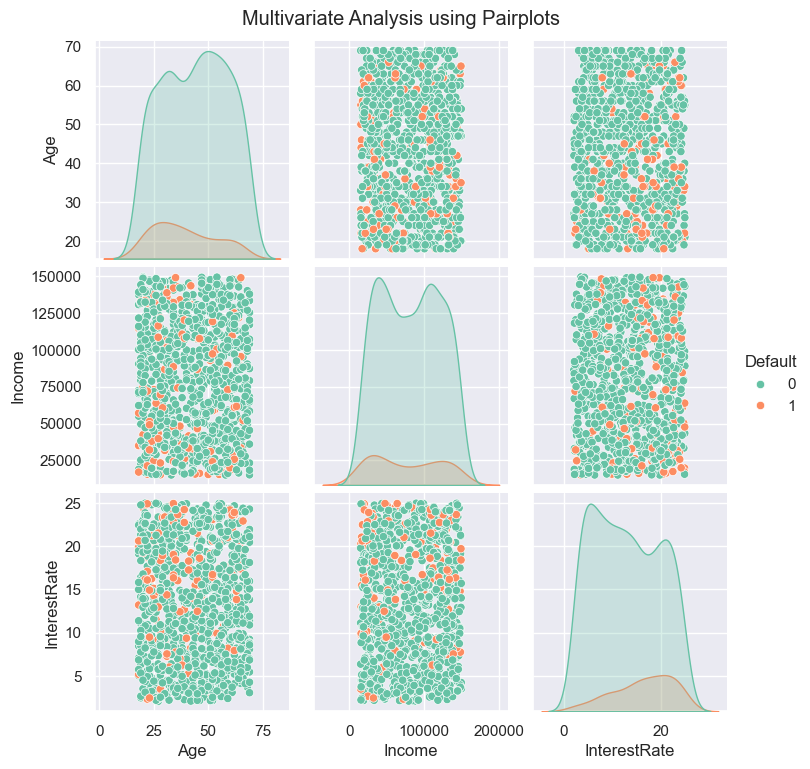

In [22]:
#Pairplot with a sample of 1000 as dataset is huge.

features = df[['Age','Income','InterestRate','Default']]

plt.figure(figsize=(20,25))

sns.pairplot(features.sample(1000), hue='Default', palette='Set2', diag_kind='kde')

plt.suptitle("Multivariate Analysis using Pairplots", y=1.02)
plt.show()

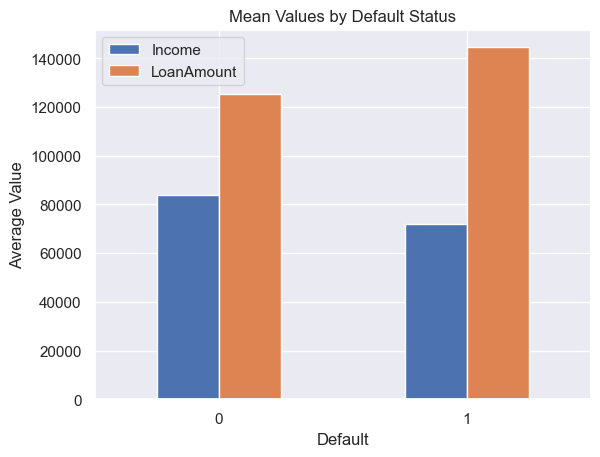

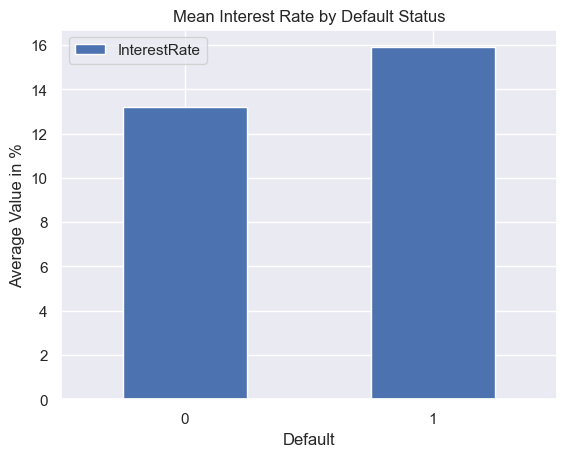

In [23]:
#Grouped Barcharts

df.groupby('Default')[['Income', 'LoanAmount']].mean().plot(kind='bar')
plt.title('Mean Values by Default Status')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()


df.groupby('Default')['InterestRate'].mean().plot(kind='bar')
plt.title('Mean Interest Rate by Default Status')
plt.ylabel('Average Value in %')
plt.legend()
plt.xticks(rotation=0)
plt.show()

**INTERPRETATION:** 

* The average income of the defaulters are lower than the average income of the non-defaulters, which suggests that higher income groups are less likely to default a loan due to financial stability.
* Average loan amount is quite higher for defaulters which indicates larger loan Amount increase the risk of loan default maybe due to over-burdening.

***Multivariate analysis reveals that individuals with lower income, higher loan amounts, and potentially higher interest rates exhibit a greater tendency to default. This insight can guide financial institutions in refining risk assessment models and in implementing more responsible lending practices***

----

**4. HYPOTHESIS TESTING & INFERENTIAL STATISTICS**

* **T-Test on Income, Loan Amount & Interest Rates**

***1. Income:***
   
   *Null Hypothesis (H0) = There is no difference in the mean incomes of the defaulters and non-defaulters.*
   
   *Alternate Hypothesis (Ha) = There is significant difference between the mean incomes of the defaulters and non-defaulters.*
   
*We will test with a confidence of 95%, hence the alpha values is 0.05*

In [24]:
inc_def = df[df['Default'] == 1]['Income']
inc_nondef = df[df['Default'] == 0]['Income']

# Levene test to check for equal variances
levene_test = stats.levene(inc_def, inc_nondef)
if levene_test.pvalue > 0.05:
    print('Equal Variance')
else:
    print('Unequal Variance')

print('-'*40)

T_statistic, P_Value = stats.ttest_ind(a=inc_def, b=inc_nondef, equal_var=False)

print(f'The test statistic score is {T_statistic:.4f} \nThe P-Value is {P_Value:.4f}')
print('-'*40)

if P_Value < 0.05:
    print('Reject the Null Hypothesis, there is strong statistical evidence that income levels differ significantly between defaulters and non-defaulters')

else:
    print('Failed to Reject Null Hypothesis, no strong statistical evidence found to conclude that income levels differs significantly.')

Unequal Variance
----------------------------------------
The test statistic score is -48.1549 
The P-Value is 0.0000
----------------------------------------
Reject the Null Hypothesis, there is strong statistical evidence that income levels differ significantly between defaulters and non-defaulters


***2. Loan Amount:***
   
   *Null Hypothesis (H0) = There is no difference in the loan amount of the defaulters and non-defaulters.*
   
   *Alternate Hypothesis (Ha) = There is significant difference between the Loan Amount of the defaulters and non-defaulters.*
   
*We will test with a confidence of 95%, hence the alpha values is 0.05*

In [25]:
loa_def = df[df['Default'] == 1]['LoanAmount']
loa_nondef = df[df['Default'] == 0]['LoanAmount']

# Levene test to check for equal variances
levene_test = stats.levene(loa_def, loa_nondef)
if levene_test.pvalue > 0.05:
    print('Equal Variance')
else:
    print('Unequal Variance')

print('-'*40)

T_statistic, P_Value = stats.ttest_ind(a=loa_def, b=loa_nondef, equal_var=False)

print(f'The test statistic score is {T_statistic:.4f} \nThe P-Value is {P_Value:.4f}')
print('-'*40)

if P_Value < 0.05:
    print('Reject the Null Hypothesis, there is strong statistical evidence that Loan Amounts differ significantly between defaulters and non-defaulters')

else:
    print('Failed to Reject Null Hypothesis, no strong statistical evidence found to conclude that Loan amount differs significantly.')

Unequal Variance
----------------------------------------
The test statistic score is 44.5176 
The P-Value is 0.0000
----------------------------------------
Reject the Null Hypothesis, there is strong statistical evidence that Loan Amounts differ significantly between defaulters and non-defaulters


***3. Interest Rates:***
   
   *Null Hypothesis (H0) = There is no difference in the interest rates of the defaulters and non-defaulters.*
   
   *Alternate Hypothesis (Ha) = There is significant difference between the interest rates of the defaulters and non-defaulters.*
   
*We will test with a confidence of 95%, hence the alpha values is 0.05*

In [26]:
intr_def = df[df['Default'] == 1]['InterestRate']
intr_nondef = df[df['Default'] == 0]['InterestRate']

# Levene test to check for equal variances
levene_test = stats.levene(intr_def, intr_nondef)
if levene_test.pvalue > 0.05:
    print('Equal Variance')
else:
    print('Unequal Variance')

print('-'*40)

T_statistic, P_Value = stats.ttest_ind(a=intr_def, b=intr_nondef, equal_var=False)

print(f'The test statistic score is {T_statistic:.4f} \nThe P-Value is {P_Value:.4f}')
print('-'*40)

if P_Value < 0.05:
    print('Reject the Null Hypothesis, there is strong statistical evidence that interest rates differ significantly between defaulters and non-defaulters')

else:
    print('Failed to Reject Null Hypothesis, no strong statistical evidence found to conclude that interest rates differs significantly.')

Unequal Variance
----------------------------------------
The test statistic score is 69.2734 
The P-Value is 0.0000
----------------------------------------
Reject the Null Hypothesis, there is strong statistical evidence that interest rates differ significantly between defaulters and non-defaulters


**INTERPRETATION:**

*Hypothesis testing was performed on features, Income, Loan Amount, & Interest rate to statistically validate if these are the key financial factors to influence the likelihood of a Loan Default. An independant T-Test was performed to check the if there is any significant difference between these features and the Default status, preceded by a Levene's Test to check the equality of variances of the features.*

*For all these three features the resulting P-value is 0.00 and it indicates a statistically significant difference between the mean values of loan defaulters and non-defaulters*

#### **CONCLUSION**

In this case study, we explored a large datset to identify the risk factors associated with loan default. Through extensive **Data Cleaning and Transformation**, followed by **Exploratory Analysis and Statistical Hypothesis Testing** we arrived at the following insights:

* Monthly Income has a strong influence on Default likelihood. Borrowers earning less than **30,000** per month are more prone to loan default
* Loan Amount also impacts the Default behaviour, the higher the loan amount the greater is the risk.
* Interest rates above **17%** and especially exceeding **22%** were also found to be associated with the Loan Default.
* Loan Tenure however doesn't have any influence on the Default rate.

All these three statistically significant factors **(Income, Loan Amount, Interest Rate)** have P-values as 0.00 rejecting the null hypothesis and indicating high risk factors associated with Loan Default.

*These insights confirm that these financial variables are statistically significant predictors of default status and can inform both risk assessment and credit policy modeling*